# US15

## Introdução

Compreender a relação entre a área de espaços verdes e os custos mensais de consumo de água é essencial para uma gestão financeira eficiente. 

Por isso, é importante realizar uma análise estatística em relação à área e custo mensal de cada espaço verde. O ficheiro "water_consumption_updated.csv" contém o custo diário de consumo de água desde a data de abertura de cada parque. O preço da água é de 0,7 €/m3 até um consumo mensal de 1000 m3, acrescentando-se uma taxa de 15% para consumos superiores.

Para realizar essa análise, é necessário seguir os seguintes passos:
1. Leitura e processamento de dados
2. Agrupamento e cálculo dos custos
3. Criar regressão linear
4. Criar modelo para visualização dos resultados

Perante estes 4 passos, para obter os resultados pretendidos foi necessário calcular:
* Média do consumo

$$\overline{X} = \frac{1}{n}\sum\limits_{i=1}^{n} x_i$$

* Regressão linear

$${y} = {\beta_0} + {\beta_1}  + \epsilon$$

* Previsão dos valores de y

$$\hat{y} = {\beta_0} + {\beta_1} X$$

* Cálculo do R quadrado

$${R^2} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$


Valor R-quadrado: 0.896
Custo médio mensal previsto para um parque de 55 hectares: 1934.166


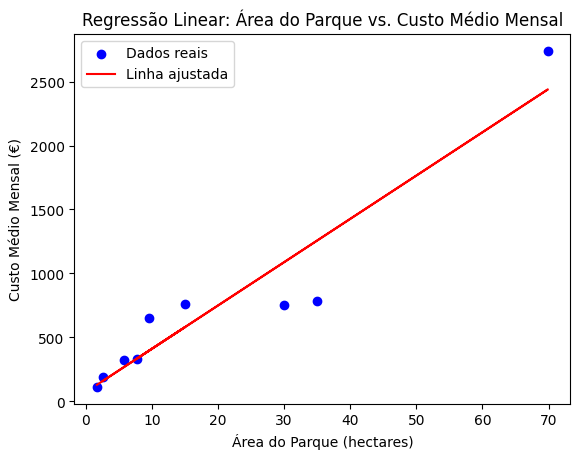

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Função para substituir vírgulas por pontos e converter para float
def convert_comma_to_dot(value):
    return float(str(value).replace(',', '.'))

# Passo 1: Ler e preprocessar os dados
# Carregar os dados de consumo de água
water_consumption = pd.read_csv('water_consumption_updated.csv', delimiter=';')
# Carregar os dados de área dos parques
park_areas = pd.read_csv('Area.csv', delimiter=';')

# Converter vírgulas para pontos nos valores numéricos e garantir que 'Consumption' é numérico
water_consumption['Consumption'] = water_consumption['Consumption'].apply(convert_comma_to_dot)

# Calcular o consumo mensal de água e os custos
def calculate_monthly_cost(consumption):
    if consumption <= 1000:
        cost = 0.7 * consumption
    else:
        cost = 0.7 * 1000 + 0.7 * 1.15 * (consumption - 1000)
    return cost

# Agrupar por parque e mês, depois calcular o consumo total e os custos
monthly_consumption = water_consumption.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()
monthly_consumption['Monthly Cost'] = monthly_consumption['Consumption'].apply(calculate_monthly_cost)

# Calcular o custo mensal médio por parque
average_monthly_cost = monthly_consumption.groupby('Park')['Monthly Cost'].mean().reset_index()
average_monthly_cost.columns = ['Park', 'Average Monthly Cost']

# Converter a área dos parques para valores numéricos
park_areas['Area'] = park_areas['Area'].apply(convert_comma_to_dot)

# Mesclar com as áreas dos parques
park_data = pd.merge(average_monthly_cost, park_areas, on='Park')

# Passo 2: Realizar regressão linear
X = park_data[['Area']]  # Variável independente: Área do parque
y = park_data['Average Monthly Cost']  # Variável dependente: Custo médio mensal

# Ajustar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Verificar a viabilidade do ajuste linear
y_pred = regressor.predict(X)
r2 = r2_score(y, y_pred)
print(f'Valor R-quadrado: {r2:.3f}')

# Prever o custo médio mensal para um novo parque com uma área de 55 hectares
new_park_area = pd.DataFrame({'Area': [55]})
predicted_cost = regressor.predict(new_park_area)
print(f'Custo médio mensal previsto para um parque de 55 hectares: {predicted_cost[0]:.3f}')

# Plotar os resultados
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, y_pred, color='red', label='Linha ajustada')
plt.xlabel('Área do Parque (hectares)')
plt.ylabel('Custo Médio Mensal (€)')
plt.title('Regressão Linear: Área do Parque vs. Custo Médio Mensal')
plt.legend()
plt.show()


## Análise dos resultados

O R-quadrado indica a proporção da variação do custo médio mensal pela área do parque. Uma vez que o seu valor é de 0.896, isto significa que 89.6% da variação nos custos mensais médios pode ser explicada pela variação na área dos parques. 

Visto ser um valor relativamente alto, podemos afirmar que há uma relação forte entre a área do parque e os custos mensais de consumo de água. Portanto, o modelo pode ser considerado bastante viável para prever os custos de novos parques baseados na sua área, devido à alta precisão do R-quadrado.

A previsão obtida do custo médio mensal para um parque com uma área de 55 hectares seria de aproximadamente 1934.17€, baseando-se na relação linear entre a área dos parques existentes e os seus custos médios mensais.

No gráfico obtido, é possível observar:
- pontos azuis: representam os valores dos dados de consumo de água x área do parque
- linha vermelha: representa a linha ajustada pelo modelo de regressão linear

A proximidade dos pontos azuis à linha vermelha indica um excelente ajuste do modelo. A inclinação da linha de regressão mostra que, conforme a área do parque aumenta, o custo médio mensal também aumenta.


# US16

## Introdução

A regressão polinomial é uma técnica estatística que permite a modelagem de relações não-lineares entre variáveis. Ao contrário da regressão linear simples, a regressão polinomial pode seguir uma tendência curvilínea, tornando-a especialmente útil quando os dados parecem seguir uma tendência não-linear. 

Podemos observar essa tendência nos dados obtidos através do ficheiro "us14.csv", que contém o tamanho das arestas e respetivo tempo de execução. Neste contexto, o objetivo é determinar a melhor linha que se ajusta aos dados, através do cálculo da regressão polinomial: 

$${y} = {\beta_0} + {\beta_1} x + {\beta_2} x^2 + {\beta_3} x^3 + ... +{\beta_m} x^m + {\epsilon}$$



Coeficientes do polinômio de grau 2:
[ 9.59580310e-05 -9.20448152e-02  5.30625390e+01]


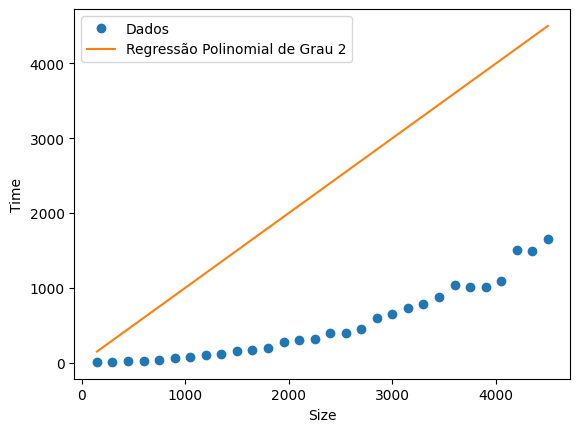

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df = pd.read_csv('us14.csv', sep=';')

# Extrair os valores de x e y do DataFrame
valoresX = df['Edges']
valoresY = df['Time']

# Ajustar uma regressão polinomial de grau 2
coeficientes = np.polyfit(valoresX, valoresY, 2)
print("Coeficientes do polinômio de grau 2:")
print(coeficientes)


# Plotar os resultados
plt.plot(valoresX, valoresY, 'o', label='Dados')
plt.plot(valoresX, (valoresX), label='Regressão Polinomial de Grau 2')
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.show()


## Análise de resultados

A curva observada no gráfico acima segue bem a tendência geral de dados. 

O coeficiente quadrático (9.60 x 10^-5) é positivo, o que indica uma relação quadrática positiva entre as variáveis e, por isso, a curva tende a ser côncova para cima.

O coeficiente linear negativo (-0.092) sugere um efeito de atenuação. Ou seja, para valores mais altos de x, o aumento de x tem um efeito menor no aumento de y. 

## Contribuição do grupo

* 1211134 Pedro Viana - 33,3%
* 1211199 Eduardo Carreiro - 33,3%
* 1221401 Beatriz Morais - 33,3%